<a href="https://colab.research.google.com/github/Karimi-Gichunge/K-NN-and-Naive-Bayes-Classifiers/blob/main/Moringa_School_Naive_Bayes_Classifier__IP_Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Email classification 

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Create a model that determines whether a given email is spam or not.

### b) Defining the Metric for Success

For our metric of success we will use:
1. Accuracy score or AUC-ROC Score where  Accuracy: Percentage of correctly identified spam and not spam message

2. Classification report which consists of:

(i) Recall: Percentage spam message manage to block

(ii) Precision: Percentage of correct message for spam e-mail

(iii) F-Score: Weighted average of precision and recall

3. Confusion matrix

(i) False Positive Rate (FP): The number of misclassified non spam emails

(ii) False Negative Rate (FN): The number of misclassified spam emails

(iii) True Positive (TP): The number of spam messages are correctly classified as spam

(iv) True Negative (TN): The number of non-spam e-mail that is correctly classified as non-spam

### c) Understanding the context 

Nowadays, e-mail provides many ways to send millions of advertisement at no cost to sender.
As a result, many unsolicited bulk e-mail, also known as spam e-mail spread widely and become
serious threat to not only the Internet but also to society. For example, when user received large
amount of e-mail spam, the chance of the user forgot to read a non-spam message increase. As
a result, many e-mail readers have to spend their time removing unwanted messages. E-mail
spam also may cost money to users with dial-up connections, waste bandwidth, and may expose
minors to unsuitable content. Over the past many years, many approaches have been provided
to block e-mail spam.
We will use Na¨ıve Bayes algorithm to create a model that acurately filters spam emails from non spam emails and classifiesthem accordingly.

### d) Data Relevance

SPAMBASE was taken from UCI machine learning repository and was created by Mark Hopkins, Erik Reeber, George Forman, and Jaap Suermondt. This dataset contains 4601 email messages and 58 attributes. This dataset collection of non-spam email came from filled work, personal e-mail and single e-mail account. This dataset is composed of a selection
of mail messages, suitable for use in testing spam filtering systems. Each instance in
SPAMBASE consists of 58 attributes. Most of the attributes represent the frequency of
a given word or character in the email that corresponds to the instance.

**Variable Notes**

* spam denotes whether the e-mail was considered spam (1) or not (0)

* Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. 
 
* The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

**Variable definition:**

at1 : word_freq_make:         continuous

at2: word_freq_address:      continuous.

at3: word_freq_all:          continuous.

at4: word_freq_3d:           continuous.

at5: word_freq_our:          continuous.

at6: word_freq_over:         continuous.

at7: word_freq_remove:       continuous.

at8: word_freq_internet:     continuous.

at9: word_freq_order:        continuous.

at10: word_freq_mail:         continuous.

at11: word_freq_receive:      continuous.

at12: word_freq_will:         continuous.

at13: word_freq_people:       continuous.

at14: word_freq_report:       continuous.

at15: word_freq_addresses:    continuous.

at16: word_freq_free:         continuous.

at17: word_freq_business:     continuous.

at18: word_freq_email:        continuous.

at19: word_freq_you:          continuous.

at20: word_freq_credit:       continuous.

at21: word_freq_your:         continuous.

at22: word_freq_font:         continuous.

at23: word_freq_000:          continuous.

at24: word_freq_money:        continuous.

at25: word_freq_hp:           continuous.

at26: word_freq_hpl:          continuous.

at27: word_freq_george:       continuous.

at28: word_freq_650:          continuous.

at29: word_freq_lab:          continuous.

at30: word_freq_labs:         continuous.

at31: word_freq_telnet:       continuous.

at32: word_freq_857:          continuous.

at33: word_freq_data:         continuous.

at34: word_freq_415:          continuous.
at35: word_freq_85:           continuous.

at36: word_freq_technology:   continuous.

at37: word_freq_1999:         continuous.

at38: word_freq_parts:        continuous.

at39: word_freq_pm:           continuous.

at40: word_freq_direct:       continuous.

word_freq_cs:           continuous.
word_freq_meeting:      continuous.
word_freq_original:     continuous.
word_freq_project:      continuous.
word_freq_re:           continuous.
word_freq_edu:          continuous.
word_freq_table:        continuous.
word_freq_conference:   continuous.
char_freq_;:            continuous.
char_freq_(:            continuous.
char_freq_[:            continuous.
char_freq_!:            continuous.
char_freq_$:            continuous.
char_freq_#:            continuous.
capital_run_length_average: continuous.
capital_run_length_longest: continuous.
capital_run_length_total:   continuous.



## 2. Reading the Data

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data')
data.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [11]:
#Checking shape of data so as to know number of attributes
print("Shape of spambase dataset: ", data.shape)

Shape of spambase dataset:  (4600, 58)


In [17]:
# create headers list
headers = ["at1","at2","at3","at4", "at5","at6",
         "at7","at8","at9", "at10","at11","at12","at13","at14", "at15","at16",
         "at17","at18","at19", "at20","at21","at22","at23","at24", "at25","at26",
         "at27","at28","at29", "at30","at31","at32","at33","at34", "at35","at36",
         "at37","at38","at39", "at40","at41","at42","at43","at44", "at45","at46",
         "at47","at48","at49", "at50","at51","at52","at53","at54", "at55","at56",
         "at57","spam"]

#Changing column names
data.columns = headers
data.head(5)


,at1,at2,at3,at4,at5,at6,at7,at8,at9,at10,at11,at12,at13,at14,at15,at16,at17,at18,at19,at20,at21,at22,at23,at24,at25,at26,at27,at28,at29,at30,at31,at32,at33,at34,at35,at36,at37,at38,at39,at40,at41,at42,at43,at44,at45,at46,at47,at48,at49,at50,at51,at52,at53,at54,at55,at56,at57,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1




## 3. Checking the Data

In [18]:
# Previewing the bottom of our dataset
# 
data.tail()

,at1,at2,at3,at4,at5,at6,at7,at8,at9,at10,at11,at12,at13,at14,at15,at16,at17,at18,at19,at20,at21,at22,at23,at24,at25,at26,at27,at28,at29,at30,at31,at32,at33,at34,at35,at36,at37,at38,at39,at40,at41,at42,at43,at44,at45,at46,at47,at48,at49,at50,at51,at52,at53,at54,at55,at56,at57,spam
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [19]:
# Checking whether each column has an appropriate datatype
#
data.dtypes

at1     float64
at2     float64
at3     float64
at4     float64
at5     float64
at6     float64
at7     float64
at8     float64
at9     float64
at10    float64
at11    float64
at12    float64
at13    float64
at14    float64
at15    float64
at16    float64
at17    float64
at18    float64
at19    float64
at20    float64
at21    float64
at22    float64
at23    float64
at24    float64
at25    float64
at26    float64
at27    float64
at28    float64
at29    float64
at30    float64
at31    float64
at32    float64
at33    float64
at34    float64
at35    float64
at36    float64
at37    float64
at38    float64
at39    float64
at40    float64
at41    float64
at42    float64
at43    float64
at44    float64
at45    float64
at46    float64
at47    float64
at48    float64
at49    float64
at50    float64
at51    float64
at52    float64
at53    float64
at54    float64
at55    float64
at56      int64
at57      int64
spam      int64
dtype: object

Dataset has the right datatypes already

## 4. Tidying the Dataset

In [20]:
# Identifying the Missing Data
#
data.isnull().sum()

at1     0
at2     0
at3     0
at4     0
at5     0
at6     0
at7     0
at8     0
at9     0
at10    0
at11    0
at12    0
at13    0
at14    0
at15    0
at16    0
at17    0
at18    0
at19    0
at20    0
at21    0
at22    0
at23    0
at24    0
at25    0
at26    0
at27    0
at28    0
at29    0
at30    0
at31    0
at32    0
at33    0
at34    0
at35    0
at36    0
at37    0
at38    0
at39    0
at40    0
at41    0
at42    0
at43    0
at44    0
at45    0
at46    0
at47    0
at48    0
at49    0
at50    0
at51    0
at52    0
at53    0
at54    0
at55    0
at56    0
at57    0
spam    0
dtype: int64

Dataset has no missing values which is very good for modelling

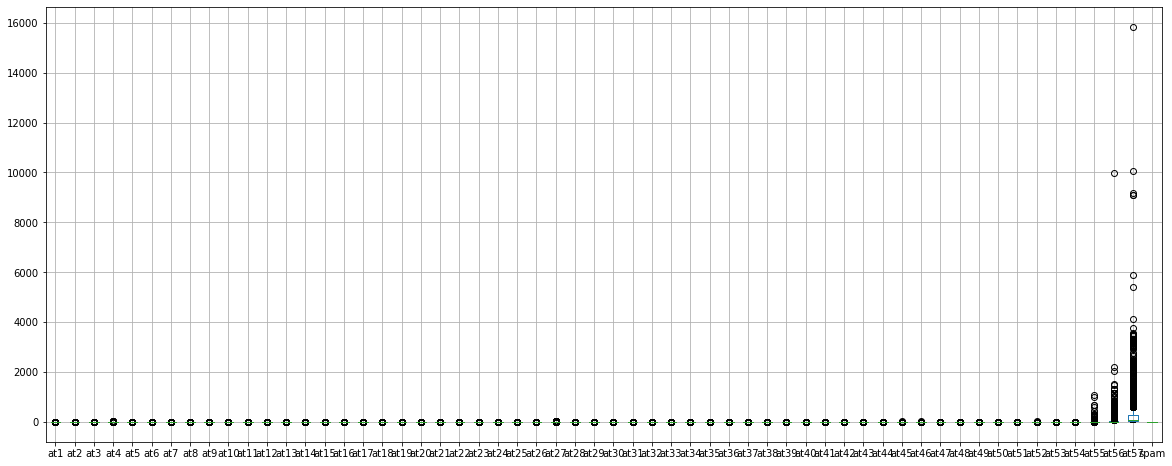

In [24]:
# Checking for Outliers
#
data.boxplot(figsize=(20,8))

## 6. Exploratory Analysis

In [29]:
#Ratio of spam vs non-spam emails
import plotly.express as px
fig = px.histogram(data, x="spam", y="at1", color="spam", width=600)
fig.show()

Most(2788) of the emails in the dataset were classified as not spam.

It's also important to not that our data is not balanced.

**Checking for multicollinearlity**

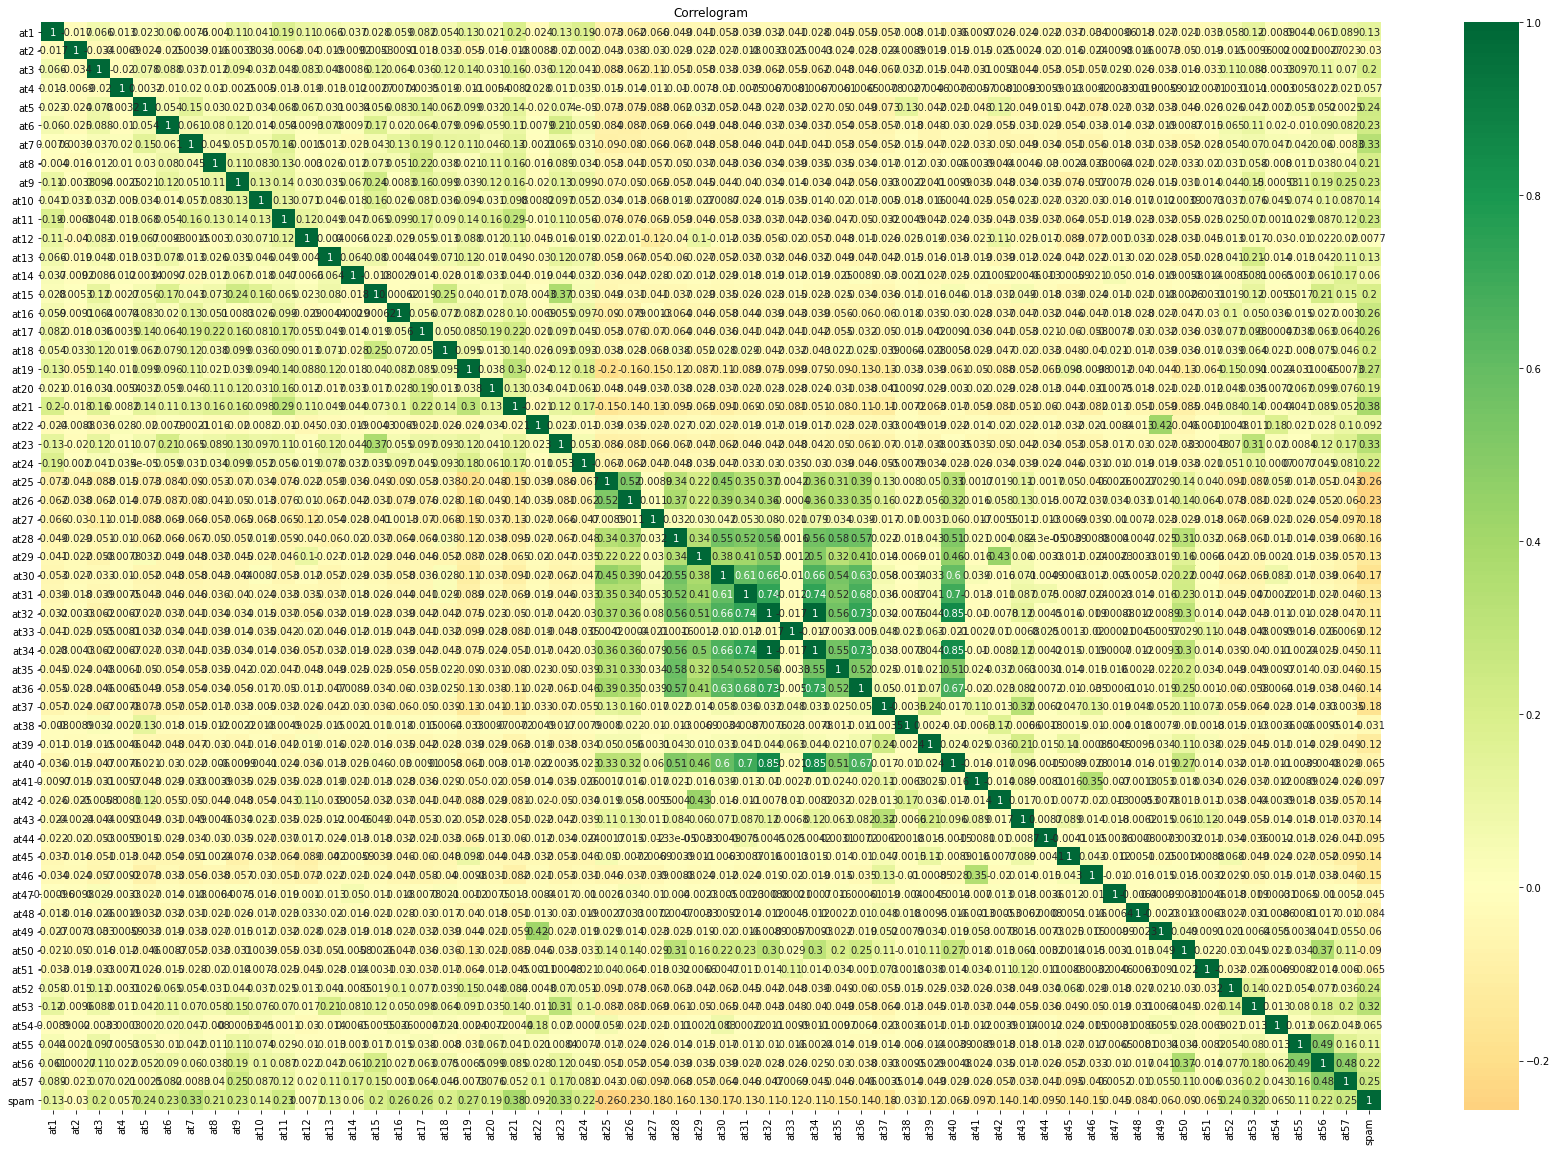

In [33]:
corr = data.corr()
plt.figure(figsize = (30, 20))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram')
plt.show()
#Below correlogram is overpopulated, one can hardly deduce any worthy information from it
#But since we are using a heatmap we will take the features with a dark green indicating 
#high correlation and look at them separately

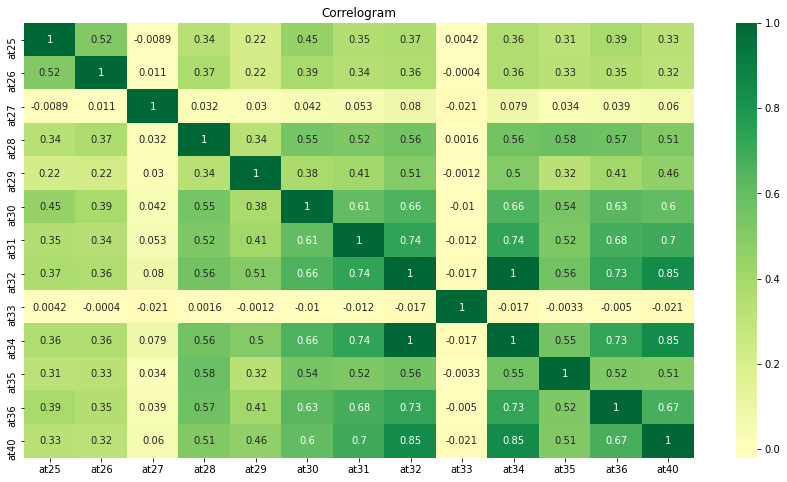

In [36]:
data_corr= data[['at25', 'at26', 'at27', 'at28', 'at29', 'at30', 'at31', 'at32', 'at33', 'at34', 'at35', 'at36', 'at40']]
corr_2 = data_corr.corr()
plt.figure(figsize = (15, 8))
sns.heatmap(corr_2, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram')
plt.show()


From the above correlogram, we can see that:

1. at40, at36,at31,at34 and a32 are highly correlated.

The performance of Naive Bayes can degrade if the data contains highly correlated features. This is because the highly correlated features are voted for twice in the model, over inflating their importance.

For our case we will create our algorithm using all features and then remove the correlated features and check the changes.


**Checking distribution of features**

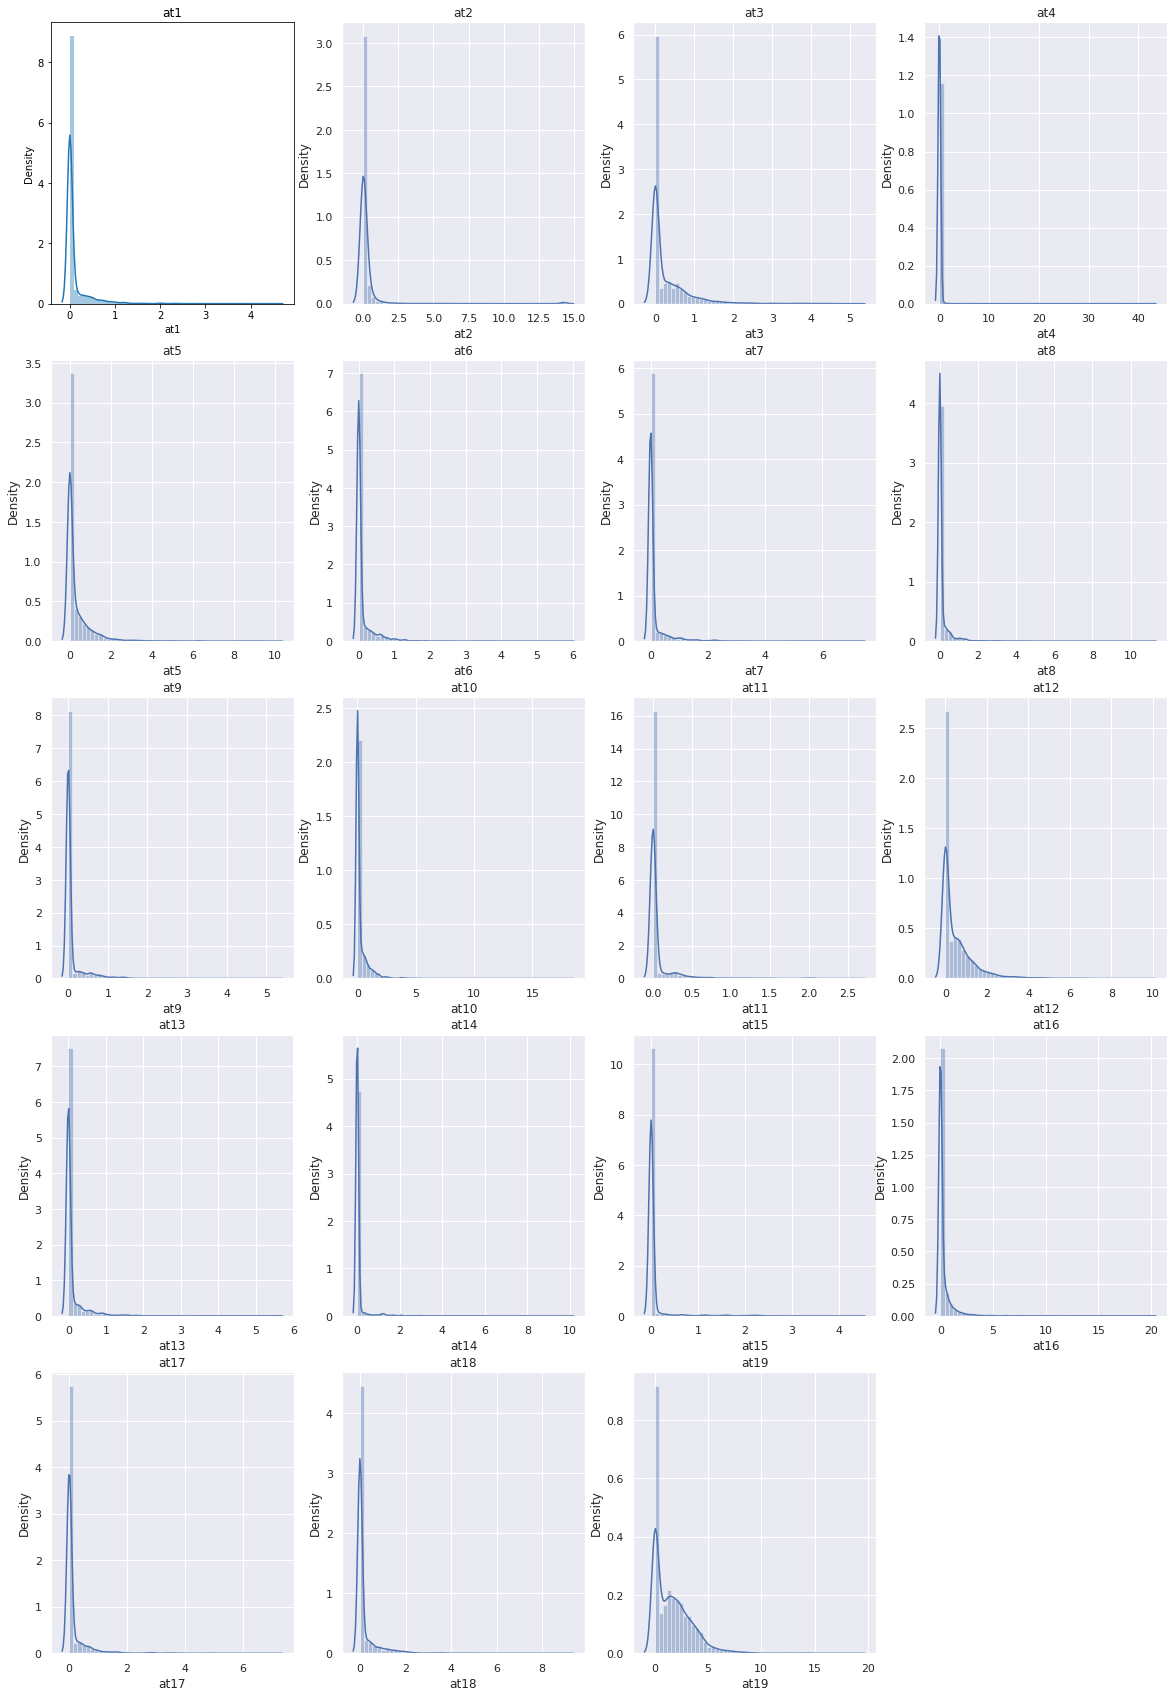

In [37]:
columns_dict={'at1': 1, 'at2': 2, 'at3': 3, 'at4': 4, 
                   'at5': 5, 'at6': 6, 'at7': 7, 'at8': 8, 'at9': 9, 
                   'at10': 10, 'at11': 11, 'at12': 12, 'at13': 13, 'at14': 14, 'at15': 15, 
                   'at16': 16, 'at17': 17, 'at18': 18, 
                   'at19': 19}
plt.figure(figsize=(20,30) )
# make a histogram plot for each variable column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  sns.distplot(data[variable])
  sns.set(style='darkgrid')
  plt.title(variable)
plt.show()

Our data doesnot follow a normal distribution, some features are skewed. But since most of the features have a gaussian like distribution, we will assume that this features follow a normal distribution.

## 6. Implementing the Solution



### **Modelling**

We will first create a baseline model with defaults and with all features. We will use all the three algorithms for naive Bayes, i.e Gaussian, Multinomial and Bernoulli. We will then choose the model that performs the best from the three and then modify it.

In [41]:
#Separate features from target
X = data.iloc[:, 1:58].values
y = data.iloc[:, -1].values

# Train using 80% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape


array([1, 1, 1, ..., 0, 0, 0])

**Gaussian_model**

In [43]:
#Classifiers
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
#Perfomance metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score



**Note:** Since our data is imbalanced we will not use accuracy score as a perfomance metric intead we will use ROC_AUC_Score

In [45]:
#Training and fitting the model
GNB = GaussianNB()
GNB.fit(X_train,y_train)
print(GNB)
# y_expect = y_test
y_pred = GNB.predict(X_test)
accuracy_score(y_test,y_pred)
#Checking performance our model with confusion matrix.

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')

#Checking performance our model with classification report.

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

#Checking performance our model with ROC Score.

print('\n')
print("=== ROC Score ===")
print(roc_auc_score(y_test, y_pred))



GaussianNB(priors=None, var_smoothing=1e-09)
=== Confusion Matrix ===
[[537   1]
 [  1 381]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       538
           1       1.00      1.00      1.00       382

    accuracy                           1.00       920
   macro avg       1.00      1.00      1.00       920
weighted avg       1.00      1.00      1.00       920



=== ROC Score ===
0.9977617314467


From the confusion matrix, our model has misclassified on two data points and has a roc_auc score of 99.7%

**Multinomial_model**

In [48]:
MNB = MultinomialNB()
MNB.fit(X_train,y_train)
print(MNB)

ym_pred = MNB.predict(X_test)
#Checking performance our model with confusion matrix.

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, ym_pred))
print('\n')

#Checking performance our model with classification report.

print("=== Classification Report ===")
print(classification_report(y_test, ym_pred))

#Checking performance our model with ROC Score.

print('\n')
print("=== ROC Score ===")
print(roc_auc_score(y_test, ym_pred))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
=== Confusion Matrix ===
[[452  86]
 [ 50 332]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       538
           1       0.79      0.87      0.83       382

    accuracy                           0.85       920
   macro avg       0.85      0.85      0.85       920
weighted avg       0.86      0.85      0.85       920



=== ROC Score ===
0.8546293232643688


With multinomial, the model performs at 85.47% , there are 136 missclassifications

**Bernoulli_model**

In [49]:
BNB = BernoulliNB()
BNB.fit(X_train,y_train)
print(BNB)

yb_pred = BNB.predict(X_test)
#Checking performance our model with confusion matrix.

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, yb_pred))
print('\n')

#Checking performance our model with classification report.

print("=== Classification Report ===")
print(classification_report(y_test, yb_pred))

#Checking performance our model with ROC Score.

print('\n')
print("=== ROC Score ===")
print(roc_auc_score(y_test, yb_pred))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
=== Confusion Matrix ===
[[531   7]
 [  6 376]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       538
           1       0.98      0.98      0.98       382

    accuracy                           0.99       920
   macro avg       0.99      0.99      0.99       920
weighted avg       0.99      0.99      0.99       920



=== ROC Score ===
0.9856410206504602


Our bernoulli model has an ROC Score of 98% and only 13 misclassification.


Gaussian model performed the best of the three using default hyperparameters and all features. Also since most of our features follow a gaussian like distribution, we will choose this as our baseline model and improve on it.


## 7. Challenging the solution

Steps for improving the baseline model
1. We will remove features that are highly correlated with each other and check the changes
2. Deal with imbalanced data
3. Normalize our dataset


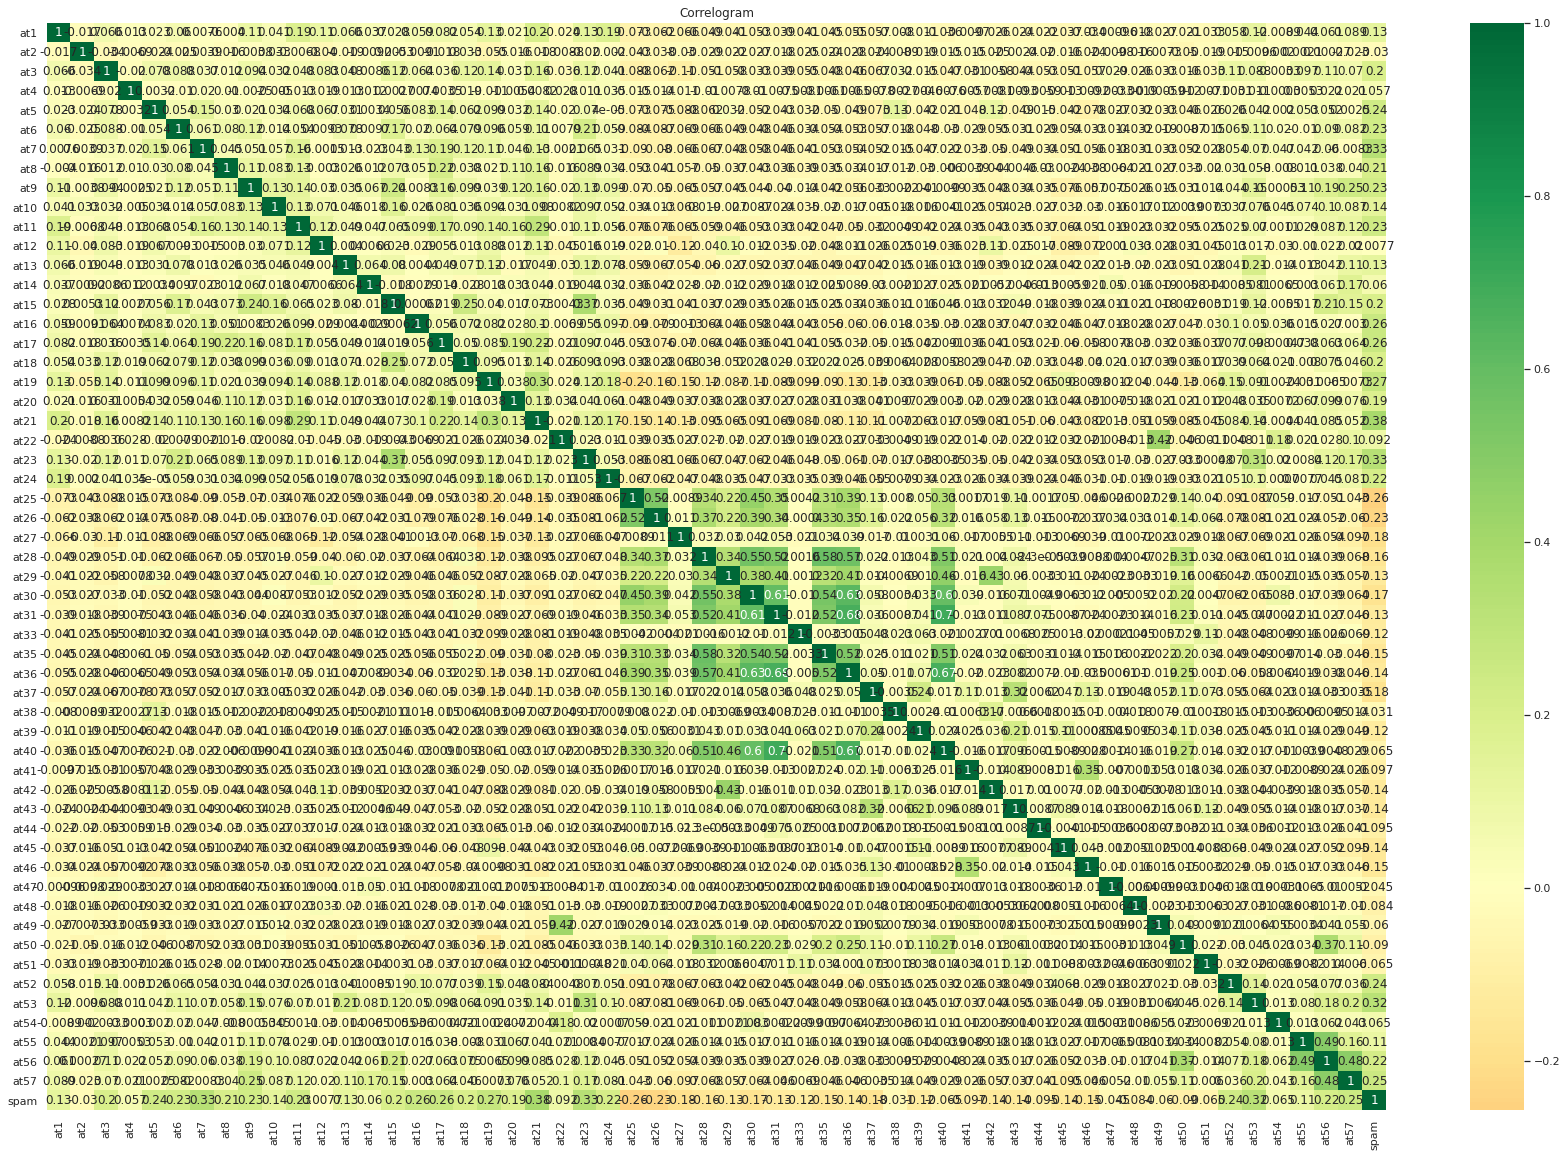

In [51]:
data_2 = data.drop(['at32', 'at34'], axis=1)
corr = data_2.corr()
plt.figure(figsize = (30, 20))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram')
plt.show()

Though our correlogram is congested we can see from the heatmap that there are no deep greens meaning that features are not highly correlated.

In [57]:
#Dealing with imbalanced data
#Separate features from target
X = data_2.iloc[:, 1:56].values
y = data_2.iloc[:, -1].values
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')



976 new random picked points


In [60]:
from sklearn import preprocessing

# normalize the data attributes
X_ros = preprocessing.normalize(X_ros)
# Train using 80% of the data.
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=0)
#X_train.shape, y_train.shape



In [61]:
#Training and fitting the model
IMP_GNB = GaussianNB()
IMP_GNB.fit(X1_train,y1_train)
print(IMP_GNB)
# y_expect = y_test
yi_pred = IMP_GNB.predict(X_test)
accuracy_score(y_test,yi_pred)
#Checking performance our model with confusion matrix.

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, yi_pred))
print('\n')

#Checking performance our model with classification report.

print("=== Classification Report ===")
print(classification_report(y_test, yi_pred))

#Checking performance our model with ROC Score.

print('\n')
print("=== ROC Score ===")
print(roc_auc_score(y_test, yi_pred))


GaussianNB(priors=None, var_smoothing=1e-09)
=== Confusion Matrix ===
[[384 187]
 [  0 545]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.67      0.80       571
           1       0.74      1.00      0.85       545

    accuracy                           0.83      1116
   macro avg       0.87      0.84      0.83      1116
weighted avg       0.88      0.83      0.83      1116



=== ROC Score ===
0.8362521891418564


Our model perfomance drops to 0.83 and the miscalssification where spam == 1 increases. From the classification report, we can see that our model doesn't perform so well.

## 8. Conclusion

E-mail spam filtering is an important issue in the network security and machine learning techniques. For our study, Gaussian Na¨ıve Bayes classifier Performed well when used with all the features and default hyperparameters.The model accurately classifies spam and non spam emails hence can be used to filter emails.


